In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import pandas as pd
import numpy as np
import os
from matplotlib.patches import Patch
from scipy import stats
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.gridspec as gridspec
from PIL import Image, ImageOps
from datetime import datetime
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import os
# sns.set()
# sns.set_palette("Paired")
sns.set_style("white")
import math

In [2]:
# Import preprocessed datasets
dir_path = os.getcwd()
full_2019 = pd.read_csv(dir_path + "/data/2019_full.csv")
train_2019 = pd.read_csv(dir_path + "/data/2019_train.csv")
cv_2019 = pd.read_csv(dir_path + "/data/2019_cv.csv")
test_2019 = pd.read_csv(dir_path + "/data/2019_test.csv")

full_2020 = pd.read_csv(dir_path + "/data/2020_full.csv")
train_2020 = pd.read_csv(dir_path + "/data/2020_train.csv")
cv_2020 = pd.read_csv(dir_path + "/data/2020_cv.csv")
test_2020 = pd.read_csv(dir_path + "/data/2020_test.csv")

In [3]:
# Calculate the total number of listings
print(len(full_2019.index))
print(len(full_2020.index))

26995
15468


In [4]:
features = ['host_history', 'host_response_rate', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',\
            'minimum_nights', 'instant_bookable', 'bathrooms', 'bedrooms', 'amenities_count',\
            'review_scores_rating', 'review_scores_location', 'number_of_reviews',\
            'Apartment', 'Bed and breakfast', 'Boutique hotel', 'Bungalow', 'Camper/RV', 'Condominium',\
            'Guest suite', 'Guesthouse', 'Hostel', 'Hotel', 'House', 'Loft', 'Resort', 'Serviced apartment',\
            'Tiny house', 'Townhouse', 'Villa',\
            'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island',\
            'Entire', 'Private', 'Shared']

In [5]:
X = train_2019[features]
y = train_2019['log_price']

In [6]:
#regularization with LASSO
reg = linear_model.Lasso(alpha=0.005)
lassoreg = reg.fit(X,y)
print('lasso r2',lassoreg.score(X, y))

lasso r2 0.5884109551007134


In [7]:
#coefficients and weights
featname = ['ones','host_history', 'host_response_rate', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',\
            'minimum_nights', 'instant_bookable', 'bathrooms', 'bedrooms', 'amenities_count',\
            'review_scores_rating', 'review_scores_location', 'number_of_reviews',\
            'Apartment', 'Bed and breakfast', 'Boutique hotel', 'Bungalow', 'Camper/RV', 'Condominium',\
            'Guest suite', 'Guesthouse', 'Hostel', 'Hotel', 'House', 'Loft', 'Resort', 'Serviced apartment',\
            'Tiny house', 'Townhouse', 'Villa',\
            'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island',\
            'Entire', 'Private', 'Shared']
coef = np.insert(lassoreg.coef_,0,lassoreg.intercept_)
#for i in range(len(coef)):
    #if coef[i]!=0:
        #print(featname[i], coef[i])
coef_table = pd.DataFrame(data={'feat_name':featname,'coef':coef})
coef_table = coef_table.sort_values(by=['coef'], ascending=False)
zero_table = coef_table.loc[(coef_table['coef']==0)]
coef_table = coef_table.loc[(coef_table['coef']!=0)]
coef_table = coef_table.reset_index()
print(coef_table[['feat_name','coef']])
print(zero_table[['feat_name','coef']])

                 feat_name      coef
0                     ones  4.240603
1                   Entire  0.665105
2                Manhattan  0.399250
3                 bedrooms  0.154464
4   review_scores_location  0.086995
5                 Brooklyn  0.074455
6                bathrooms  0.062643
7                     Loft  0.044799
8          amenities_count  0.036762
9             host_history  0.035082
10       host_is_superhost  0.007297
11  host_identity_verified  0.005160
12      host_response_rate -0.008409
13       number_of_reviews -0.024645
14          minimum_nights -0.030788
15                   House -0.065973
16               Apartment -0.105762
17                  Shared -0.124962
               feat_name  coef
34                Queens  -0.0
35         Staten Island  -0.0
23                 Hotel   0.0
37               Private  -0.0
31                 Bronx  -0.0
30                 Villa  -0.0
29             Townhouse  -0.0
28            Tiny house  -0.0
27    Serviced apa

In [8]:
clean_features = ['host_history', 'host_response_rate', 'host_is_superhost', 'host_identity_verified',\
            'minimum_nights', 'bathrooms', 'bedrooms', 'amenities_count',\
            'review_scores_location', 'number_of_reviews',\
            'Apartment', 'Bed and breakfast', 'Boutique hotel', 'Bungalow', 'Camper/RV', 'Condominium',\
            'Guest suite', 'Guesthouse', 'Hostel', 'Hotel', 'House', 'Loft', 'Resort', 'Serviced apartment',\
            'Tiny house', 'Townhouse', 'Villa',\
            'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island',\
            'Entire', 'Private', 'Shared']

In [40]:
X = train_2019[clean_features]
y = train_2019['log_price']
cv_X = cv_2019[clean_features]
cv_y = cv_2019['log_price']
test_X = test_2019[clean_features]
test_y = test_2019['log_price']

train r2 0.6206087624393645
train mse 0.16274223741699356
cv mse 0.17132439271125757
cv r2 0.6385862246216943
test mse 0.17791661278405949
test r2 0.656752497237244


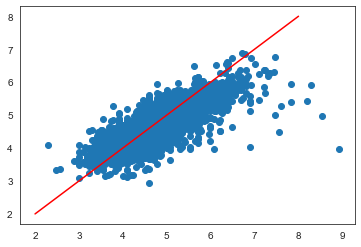

In [41]:
#linear regression
reg = LinearRegression().fit(X, y)
print('train r2',reg.score(X, y))
predicted_y = reg.predict(X)
mse = mean_squared_error(y, predicted_y)
print('train mse', mse)

predicted_y = reg.predict(cv_X)
mse = mean_squared_error(cv_y, predicted_y)
print('cv mse', mse)
print('cv r2', reg.score(cv_X, cv_y))

predicted_y = reg.predict(test_X)
mse = mean_squared_error(test_y, predicted_y)
print('test mse', mse)
print('test r2', reg.score(test_X, test_y))
plt.scatter(test_y, predicted_y)
plt.plot(range(2,9),range(2,9),color='red')

train r2 0.669964819605479
train mse 0.1415706488875912
cv mse 779365459978803.6
cv r2 -1644094041909775.0
test mse 2341481645528337.5
test r2 -4517328174226790.0


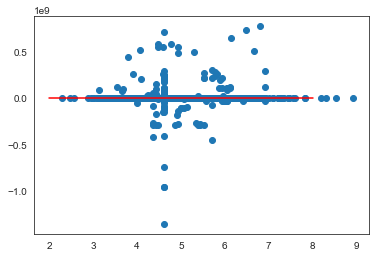

In [11]:
#polynomial regression with degree=2
poly2 = PolynomialFeatures(degree=2)
X_ = poly2.fit_transform(X)
clf = linear_model.LinearRegression()
polyreg2 = clf.fit(X_, y)
print('train r2', polyreg2.score(X_, y))
predicted_y = polyreg2.predict(X_)
mse = mean_squared_error(y, predicted_y)
print('train mse', mse)
predict_ = poly2.fit_transform(cv_X)
predicted_y = polyreg2.predict(predict_)
mse = mean_squared_error(cv_y, predicted_y)
print('cv mse', mse)
print('cv r2', polyreg2.score(predict_, cv_y))
predict_ = poly2.fit_transform(test_X)
predicted_y = polyreg2.predict(predict_)
mse = mean_squared_error(test_y, predicted_y)
print('test mse', mse)
print('test r2', polyreg2.score(predict_, test_y))
plt.scatter(test_y, predicted_y)
plt.plot(range(2,9),range(2,9),color='red')

train r2 0.7182623416342061
train mse 0.120853125606903
cv mse 74.91897687545514
cv r2 -157.0437546080911
test mse 65.36183293825951
test r2 -125.100005957758


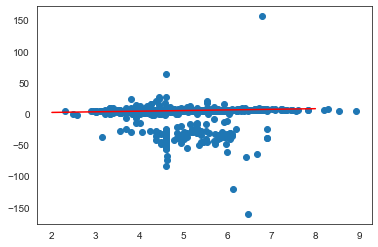

In [12]:
#polynomial regression with degree=3
poly3 = PolynomialFeatures(degree=3)
X_ = poly3.fit_transform(X)
clf = linear_model.LinearRegression()
polyreg3 = clf.fit(X_, y)
print('train r2', polyreg3.score(X_, y))
predicted_y = polyreg3.predict(X_)
mse = mean_squared_error(y, predicted_y)
print('train mse', mse)
predict_ = poly3.fit_transform(cv_X)
predicted_y = polyreg3.predict(predict_)
mse = mean_squared_error(cv_y, predicted_y)
print('cv mse', mse)
print('cv r2', polyreg3.score(predict_, cv_y))
predict_ = poly3.fit_transform(test_X)
predicted_y = polyreg3.predict(predict_)
mse = mean_squared_error(test_y, predicted_y)
print('test mse', mse)
print('test r2', polyreg3.score(predict_, test_y))
plt.scatter(test_y, predicted_y)
plt.plot(range(2,9),range(2,9),color='red')

train r2 0.6138598549064025
train mse 0.16563722339267548
cv mse 0.17120805152046042
cv r2 0.6388316497379465
test mse 0.17863627842673419
test r2 0.6553640747015022


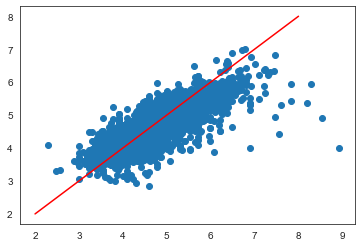

In [13]:
# SVR - linear kernel
SVR_linear = SVR(kernel='linear').fit(X,y)
print('train r2', SVR_linear.score(X,y))
predicted_y = SVR_linear.predict(X)
mse = mean_squared_error(y, predicted_y)
print('train mse', mse)
predicted_y = SVR_linear.predict(cv_X)
mse = mean_squared_error(cv_y, predicted_y)
print('cv mse', mse)
print('cv r2', SVR_linear.score(cv_X, cv_y))
predicted_y = SVR_linear.predict(test_X)
mse = mean_squared_error(test_y, predicted_y)
print('test mse', mse)
print('test r2', SVR_linear.score(test_X, test_y))
plt.scatter(test_y, predicted_y)
plt.plot(range(2,9),range(2,9),color='red')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


train r2 0.6745986494691464
train mse 0.13958293866878999
cv mse 0.15624348472566124
cv r2 0.670399837411749
test mse 0.1556860487207377
test r2 0.6996410475549373


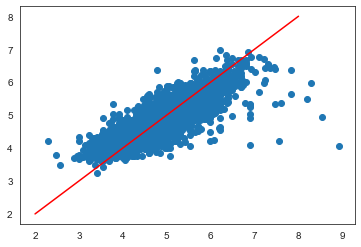

In [42]:
# SVR - RBF kernel
SVR_rbf = SVR(kernel='rbf').fit(X,y)
print('train r2', SVR_rbf.score(X,y))
predicted_y = SVR_rbf.predict(X)
mse = mean_squared_error(y, predicted_y)
print('train mse', mse)
predicted_y = SVR_rbf.predict(cv_X)
mse = mean_squared_error(cv_y, predicted_y)
print('cv mse', mse)
print('cv r2', SVR_rbf.score(cv_X, cv_y))
predicted_y = SVR_rbf.predict(test_X)
mse = mean_squared_error(test_y, predicted_y)
print('test mse', mse)
print('test r2', SVR_rbf.score(test_X, test_y))
plt.scatter(test_y, predicted_y)
plt.plot(range(2,9),range(2,9),color='red')

In [15]:
# SVR - Polynomial degree=1
SVR_poly1 = SVR(kernel='poly',degree=1).fit(X,y)
print('train r2', SVR_poly1.score(X,y))
predicted_y = SVR_poly1.predict(X)
mse = mean_squared_error(y, predicted_y)
print('train mse', mse)
predicted_y = SVR_poly1.predict(cv_X)
mse = mean_squared_error(cv_y, predicted_y)
print('cv mse', mse)
print('cv r2', SVR_poly1.score(cv_X, cv_y))
predicted_y = SVR_poly1.predict(test_X)
mse = mean_squared_error(test_y, predicted_y)
print('test mse', mse)
print('test r2', SVR_poly1.score(test_X, test_y))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


train r2 0.6100817641151015
train mse 0.16725785899958664
cv mse 0.17337585052929305
cv r2 0.6342586148557277
test mse 0.17939388551486118
test r2 0.6539024532317265


In [16]:
# SVR - Polynomial degree=2
SVR_poly2 = SVR(kernel='poly',degree=2).fit(X,y)
print('train r2', SVR_poly2.score(X,y))
predicted_y = SVR_poly2.predict(X)
mse = mean_squared_error(y, predicted_y)
print('train mse', mse)
predicted_y = SVR_poly2.predict(cv_X)
mse = mean_squared_error(cv_y, predicted_y)
print('cv mse', mse)
print('cv r2', SVR_poly2.score(cv_X, cv_y))
predicted_y = SVR_poly2.predict(test_X)
mse = mean_squared_error(test_y, predicted_y)
print('test mse', mse)
print('test r2', SVR_poly2.score(test_X, test_y))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


train r2 0.6353144367611009
train mse 0.15643414670506053
cv mse 0.17600733212244807
cv r2 0.6287074281136067
test mse 0.17633753649618478
test r2 0.6597989468295749


In [17]:
# SVR - Polynomial degree=3
SVR_poly3 = SVR(kernel='poly').fit(X,y)
print('train r2', SVR_poly3.score(X,y))
predicted_y = SVR_poly3.predict(X)
mse = mean_squared_error(y, predicted_y)
print('train mse', mse)
predicted_y = SVR_poly3.predict(cv_X)
mse = mean_squared_error(cv_y, predicted_y)
print('cv mse', mse)
print('cv r2', SVR_poly3.score(cv_X, cv_y))
predicted_y = SVR_poly3.predict(test_X)
mse = mean_squared_error(test_y, predicted_y)
print('test mse', mse)
print('test r2', SVR_poly3.score(test_X, test_y))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


train r2 0.5988806977918086
train mse 0.1720626262541743
cv mse 0.22647071051763484
cv r2 0.5222534677900101
test mse 0.23352306255447844
test r2 0.549473167204332


In [18]:
# SVR - Sigmoid
SVR_sig = SVR(kernel='sigmoid').fit(X,y)
print('train r2', SVR_sig.score(X,y))
predicted_y = SVR_sig.predict(X)
mse = mean_squared_error(y, predicted_y)
print('train mse', mse)
predicted_y = SVR_sig.predict(cv_X)
mse = mean_squared_error(cv_y, predicted_y)
print('cv mse', mse)
print('cv r2', SVR_sig.score(cv_X, cv_y))
predicted_y = SVR_sig.predict(test_X)
mse = mean_squared_error(test_y, predicted_y)
print('test mse', mse)
print('test r2', SVR_sig.score(test_X, test_y))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


train r2 -1304.0788554260566
train mse 559.8217141314457
cv mse 130.8329533572062
cv r2 -274.99590968002667
test mse 231.69293449544978
test r2 -445.996038924496


Text(0, 0.5, 'validation mse')

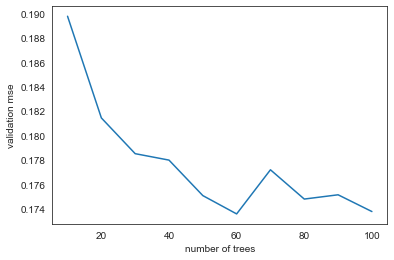

In [19]:
# Random Forest with different number of trees
cv_mses = []
for num in np.arange(10,110,10):
    clf = RandomForestRegressor(n_estimators=num).fit(X,y)
    predicted_y = clf.predict(cv_X)
    cv_mse = mean_squared_error(cv_y, predicted_y)
    cv_mses.append(cv_mse)
plt.plot(np.arange(10,110,10),cv_mses)
plt.xlabel("number of trees")
plt.ylabel("validation mse")

train r2 0.9512541260481194
train mse 0.020909846634262052
cv mse 0.1784214557194199
cv r2 0.6236147643685093
test mse 0.18868993809912293
test r2 0.6359679456825529


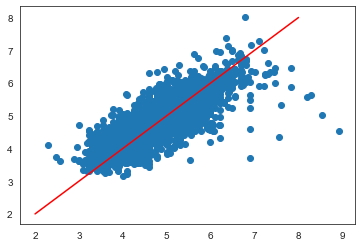

In [43]:
# Random Forest Model
RFR = RandomForestRegressor(n_estimators=60).fit(X,y)
print('train r2', RFR.score(X,y))
predicted_y = RFR.predict(X)
mse = mean_squared_error(y, predicted_y)
print('train mse', mse)
predicted_y = RFR.predict(cv_X)
mse = mean_squared_error(cv_y, predicted_y)
print('cv mse', mse)
print('cv r2', RFR.score(cv_X, cv_y))
predicted_y = RFR.predict(test_X)
mse = mean_squared_error(test_y, predicted_y)
print('test mse', mse)
print('test r2', RFR.score(test_X, test_y))
plt.scatter(test_y, predicted_y)
plt.plot(range(2,9),range(2,9),color='red')

In [44]:
# predict 2020 data with 2019 model
X_2020 = test_2020[clean_features]
y_2020 = test_2020['log_price']
X_2019 = test_2019[clean_features]
y_2019 = test_2019['log_price']
mean_2020 = round(np.mean(y_2020),4)
mean_2019 = round(np.mean(y_2019),4)
bs =[2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9] 

4.689544110062352
2020 mse 0.24517822505339715
2020 r2 0.5667703842878112


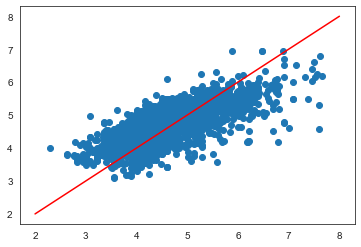

In [45]:
# Linear Regression
predicted_y = reg.predict(X_2020)
print(np.mean(predicted_y))
mse = mean_squared_error(y_2020, predicted_y)
print('2020 mse', mse)
print('2020 r2', reg.score(X_2020, y_2020))
predicted_mean = round(np.mean(predicted_y),4)
plt.scatter(y_2020, predicted_y)
plt.plot(range(2,9),range(2,9),color='red')

Text(6.5, 400, 'actual mean = 4.5923')

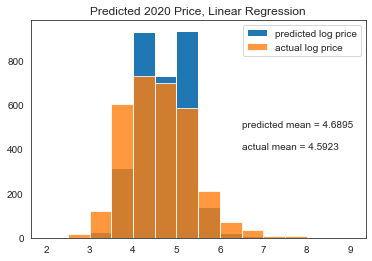

In [48]:
# plot 2020 actual vs predicted price with Linear Regression
plt.hist(predicted_y, label='predicted log price',bins=bs)
plt.hist(y_2020, alpha=0.8, label='actual log price',bins=bs)
plt.legend(loc='upper right')
plt.title('Predicted 2020 Price, Linear Regression')
plt.text(6.5,500,'predicted mean = '+str(predicted_mean))
plt.text(6.5,400,'actual mean = '+str(mean_2020))

4.663296134120809
2019 mse 0.17791661278405949
2019 r2 0.656752497237244


Text(6.5, 400, 'actual mean = 4.7296')

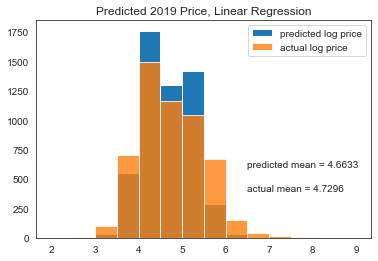

In [50]:
# plot 2019 actual vs predicted price with Linear Regression
predicted_y = reg.predict(X_2019)
print(np.mean(predicted_y))
predicted_mean = round(np.mean(predicted_y),4)
mse = mean_squared_error(y_2019, predicted_y)
print('2019 mse', mse)
print('2019 r2', reg.score(X_2019, y_2019))
plt.hist(predicted_y, label='predicted log price',bins=bs)
plt.hist(y_2019, alpha=0.8, label='actual log price',bins=bs)
plt.legend(loc='upper right')
plt.title('Predicted 2019 Price, Linear Regression')
plt.text(6.5,600,'predicted mean = '+str(predicted_mean))
plt.text(6.5,400,'actual mean = '+str(mean_2019))

2020 mse 0.23331138446284472
2020 r2 0.5877390767059212


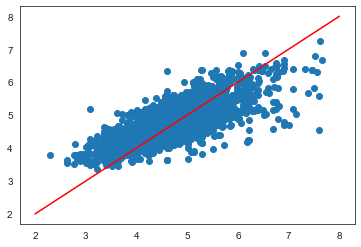

In [51]:
# SVR RBF
predicted_y = SVR_rbf.predict(X_2020)
predicted_mean = round(np.mean(predicted_y),4)
mse = mean_squared_error(y_2020, predicted_y)
print('2020 mse', mse)
print('2020 r2', SVR_rbf.score(X_2020, y_2020))
plt.scatter(y_2020, predicted_y)
plt.plot(range(2,9),range(2,9),color='red')

Text(6.5, 400, 'actual mean = 4.5923')

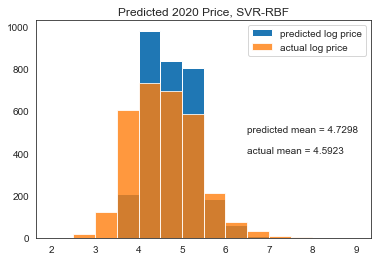

In [52]:
# plot 2020 actual vs predicted price with SVR - RBF
plt.hist(predicted_y, label='predicted log price',bins=bs)
plt.hist(y_2020, alpha=0.8, label='actual log price',bins=bs)
plt.legend(loc='upper right')
plt.title('Predicted 2020 Price, SVR-RBF')
plt.text(6.5,500,'predicted mean = '+str(predicted_mean))
plt.text(6.5,400,'actual mean = '+str(mean_2020))

4.716647216940943
2019 mse 0.1556860487207377
2019 r2 0.6996410475549373


Text(6.5, 400, 'actual mean = 4.7296')

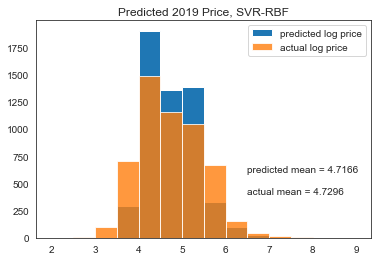

In [53]:
# plot 2019 actual vs predicted price with SVR - RBF
predicted_y = SVR_rbf.predict(X_2019)
print(np.mean(predicted_y))
predicted_mean = round(np.mean(predicted_y),4)
mse = mean_squared_error(y_2019, predicted_y)
print('2019 mse', mse)
print('2019 r2', SVR_rbf.score(X_2019, y_2019))
plt.hist(predicted_y, label='predicted log price',bins=bs)
plt.hist(y_2019, alpha=0.8, label='actual log price',bins=bs)
plt.legend(loc='upper right')
plt.title('Predicted 2019 Price, SVR-RBF')
plt.text(6.5,600,'predicted mean = '+str(predicted_mean))
plt.text(6.5,400,'actual mean = '+str(mean_2019))

4.753110712213382 4
2020 mse 0.27277134116179985
2020 r2 0.5180133827827158


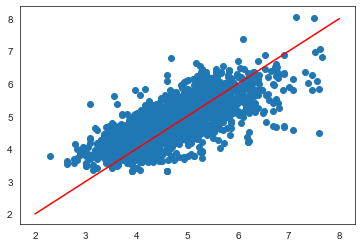

In [54]:
# Random Forest
predicted_y = RFR.predict(X_2020)
print(np.mean(predicted_y),4)
predicted_mean = round(np.mean(predicted_y),4)
mse = mean_squared_error(y_2020, predicted_y)
print('2020 mse', mse)
print('2020 r2', RFR.score(X_2020, y_2020))
plt.scatter(y_2020, predicted_y)
plt.plot(range(2,9),range(2,9),color='red')

Text(6.5, 400, 'actual mean = 4.5923')

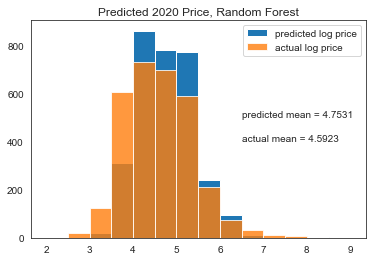

In [55]:
# plot 2020 actual vs predicted price with Random Forest
plt.hist(predicted_y, label='predicted log price',bins=bs)
plt.hist(y_2020, alpha=0.8, label='actual log price',bins=bs)
plt.legend(loc='upper right')
plt.title('Predicted 2020 Price, Random Forest')
plt.text(6.5,500,'predicted mean = '+str(predicted_mean))
plt.text(6.5,400,'actual mean = '+str(mean_2020))

4.734910328483674
2019 mse 0.18868993809912293
2019 r2 0.6359679456825529


Text(6.5, 400, 'actual mean = 4.7296')

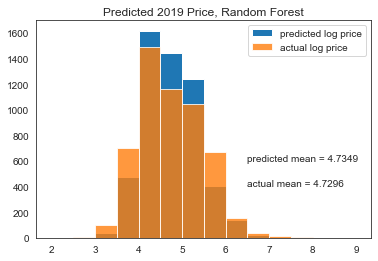

In [56]:
# plot 2019 actual vs predicted price with Random Forest
predicted_y = RFR.predict(X_2019)
print(np.mean(predicted_y))
predicted_mean = round(np.mean(predicted_y),4)
mse = mean_squared_error(y_2019, predicted_y)
print('2019 mse', mse)
print('2019 r2', RFR.score(X_2019, y_2019))
plt.hist(predicted_y, label='predicted log price',bins=bs)
plt.hist(y_2019, alpha=0.8, label='actual log price',bins=bs)
plt.legend(loc='upper right')
plt.title('Predicted 2019 Price, Random Forest')
plt.text(6.5,600,'predicted mean = '+str(predicted_mean))
plt.text(6.5,400,'actual mean = '+str(mean_2019))

In [31]:
# 2020 prediction models
features = ['host_history', 'host_response_rate', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',\
            'minimum_nights', 'instant_bookable', 'bathrooms', 'bedrooms', 'amenities_count',\
            'review_scores_rating', 'review_scores_location', 'number_of_reviews',\
            'Apartment', 'Bed and breakfast', 'Boutique hotel', 'Bungalow', 'Camper/RV', 'Condominium',\
            'Guest suite', 'Guesthouse', 'Hostel', 'Hotel', 'House', 'Loft', 'Resort', 'Serviced apartment',\
            'Tiny house', 'Townhouse', 'Villa',\
            'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island',\
            'Entire', 'Private', 'Shared']

In [32]:
X = train_2020[features]
y = train_2020['log_price']

In [33]:
#regularization with LASSO
reg = linear_model.Lasso(alpha=0.005)
lassoreg = reg.fit(X,y)
lassoreg.score(X, y)

0.5672016425892001

In [34]:
#coefficients and weights
featname = ['ones','host_history', 'host_response_rate', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',\
            'minimum_nights', 'instant_bookable', 'bathrooms', 'bedrooms', 'amenities_count',\
            'review_scores_rating', 'review_scores_location', 'number_of_reviews',\
            'Apartment', 'Bed and breakfast', 'Boutique hotel', 'Bungalow', 'Camper/RV', 'Condominium',\
            'Guest suite', 'Guesthouse', 'Hostel', 'Hotel', 'House', 'Loft', 'Resort', 'Serviced apartment',\
            'Tiny house', 'Townhouse', 'Villa',\
            'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island',\
            'Entire', 'Private', 'Shared']
coef = np.insert(lassoreg.coef_,0,lassoreg.intercept_)
#for i in range(len(coef)):
    #if coef[i]!=0:
        #print(featname[i], coef[i])
coef_table = pd.DataFrame(data={'feat_name':featname,'coef':coef})
coef_table = coef_table.sort_values(by=['coef'], ascending=False)
zero_table = coef_table.loc[(coef_table['coef']==0)]
coef_table = coef_table.loc[(coef_table['coef']!=0)]
coef_table = coef_table.reset_index()
print(coef_table[['feat_name','coef']])
print(zero_table[['feat_name','coef']])

                 feat_name      coef
0                     ones  4.236899
1                   Entire  0.658666
2                Manhattan  0.357656
3                 bedrooms  0.193412
4                 Brooklyn  0.079789
5                bathrooms  0.072166
6   review_scores_location  0.058060
7             host_history  0.042147
8          amenities_count  0.032107
9     review_scores_rating  0.026419
10                    Loft  0.026119
11       host_is_superhost  0.023804
12  host_identity_verified  0.005505
13      host_response_rate -0.025305
14       number_of_reviews -0.038116
15          minimum_nights -0.060153
16                   House -0.069413
17               Apartment -0.155461
18                  Shared -0.155553
               feat_name  coef
34                Queens  -0.0
23                 Hotel   0.0
35         Staten Island  -0.0
31                 Bronx  -0.0
30                 Villa  -0.0
29             Townhouse  -0.0
28            Tiny house  -0.0
37          

In [35]:
clean_features = ['host_history', 'host_response_rate', 'host_is_superhost', 'host_identity_verified',\
            'minimum_nights', 'bathrooms', 'bedrooms', 'amenities_count',\
            'review_scores_location', 'number_of_reviews',\
            'Apartment', 'Bed and breakfast', 'Boutique hotel', 'Bungalow', 'Camper/RV', 'Condominium',\
            'Guest suite', 'Guesthouse', 'Hostel', 'Hotel', 'House', 'Loft', 'Resort', 'Serviced apartment',\
            'Tiny house', 'Townhouse', 'Villa',\
            'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island',\
            'Entire', 'Private', 'Shared']

In [36]:
X = train_2020[clean_features]
y = train_2020['log_price']
cv_X = cv_2020[clean_features]
cv_y = cv_2020['log_price']
test_X = test_2020[clean_features]
test_y = test_2020['log_price']

train r2 0.5934825468031976
train mse 0.20809861735901225
cv mse 0.21667190420703647
cv r2 0.6174652119312457
test mse 0.23018200327745755
test r2 0.5932686893298277


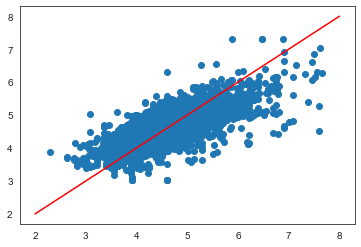

In [37]:
#linear regression
reg = LinearRegression().fit(X, y)
print('train r2',reg.score(X, y))
predicted_y = reg.predict(X)
mse = mean_squared_error(y, predicted_y)
print('train mse', mse)

predicted_y = reg.predict(cv_X)
mse = mean_squared_error(cv_y, predicted_y)
print('cv mse', mse)
print('cv r2', reg.score(cv_X, cv_y))

predicted_y = reg.predict(test_X)
mse = mean_squared_error(test_y, predicted_y)
print('test mse', mse)
print('test r2', reg.score(test_X, test_y))
plt.scatter(test_y, predicted_y)
plt.plot(range(2,9),range(2,9),color='red')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


train r2 0.6644455397316291
train mse 0.1717722540111762
cv mse 0.2073254978376233
cv r2 0.6339663157213875
test mse 0.22372684286252054
test r2 0.6046749496749894


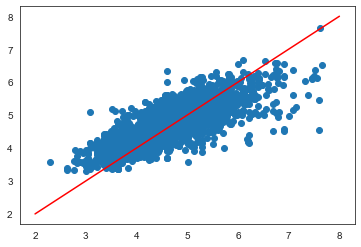

In [38]:
# SVR - RBF kernel
SVR_rbf = SVR(kernel='rbf').fit(X,y)
print('train r2', SVR_rbf.score(X,y))
predicted_y = SVR_rbf.predict(X)
mse = mean_squared_error(y, predicted_y)
print('train mse', mse)
predicted_y = SVR_rbf.predict(cv_X)
mse = mean_squared_error(cv_y, predicted_y)
print('cv mse', mse)
print('cv r2', SVR_rbf.score(cv_X, cv_y))
predicted_y = SVR_rbf.predict(test_X)
mse = mean_squared_error(test_y, predicted_y)
print('test mse', mse)
print('test r2', SVR_rbf.score(test_X, test_y))
plt.scatter(test_y, predicted_y)
plt.plot(range(2,9),range(2,9),color='red')

train r2 0.9517419313029009
train mse 0.024703582326687564
cv mse 0.23650455614859653
cv r2 0.5824506153915083
test mse 0.30157871064090663
test r2 0.4671107970967545


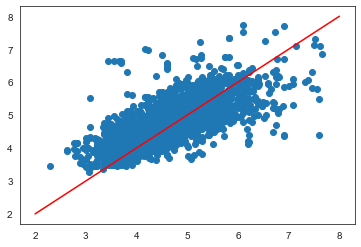

In [39]:
# Random Forest Model
RFR = RandomForestRegressor(n_estimators=50).fit(X,y)
print('train r2', RFR.score(X,y))
predicted_y = RFR.predict(X)
mse = mean_squared_error(y, predicted_y)
print('train mse', mse)
predicted_y = RFR.predict(cv_X)
mse = mean_squared_error(cv_y, predicted_y)
print('cv mse', mse)
print('cv r2', RFR.score(cv_X, cv_y))
predicted_y = RFR.predict(test_X)
mse = mean_squared_error(test_y, predicted_y)
print('test mse', mse)
print('test r2', RFR.score(test_X, test_y))
plt.scatter(test_y, predicted_y)
plt.plot(range(2,9),range(2,9),color='red')